#**Task**

This project analyzes LinkedIn job postings to uncover trends in job titles, required skills, industries, and locations. Using NLP and data analytics, we explore patterns, classify job categories, and visualize emerging skill demands to better understand the job market. Differentiation Note: Unlike systems that simply recommend job titles based on users’ skills, our project focuses on market-wide insights, analyzing trends, clustering jobs, and identifying in-demand skills, rather than personalized career recommendations

## Source and Goal

The purpose of this dataset is to classify job categories, and analyze the market trends based on the analysis of Linkedin posts to discover the emerging skills need and gain better understanding regarding job market demands without personalized recommendations

the data set is collected from Kaggle which is a public platform sharing



datasets for data analysis and machine learning. View dataset [here](https://www.kaggle.com/datasets/arshkon/linkedin-job-postings)

##General Information


Number of observations/features:

Number of rows (job postings): 123,850

Number of columns (features): 12 ('company_name', 'title', 'description', 'skills_desc', 'formatted_experience_level', 'formatted_work_type', 'location',
       'views', 'applies', 'remote_allowed', 'city', 'state')

Data types:

Textual (company_name, title, description, skills_desc, formatted_experience_level, formatted_work_type, location, city, state)

Numeric (views,applies)

Integer (remote_allowed)

Description of the target variable/classes:

Target variable: The predicted skill set for each job

Classes: (python, java, excel, SEO, Public Relations, Fundraising….etc.)






##1. Read Dataset

###Read Dataset

In [261]:
# 1. Download Dataset from Kaggle
from google.colab import files
import kagglehub

# Download the latest version of the LinkedIn Job Postings dataset
path = kagglehub.dataset_download("arshkon/linkedin-job-postings")

print(" Dataset downloaded successfully!")
print("Path to dataset files:", path)

#==============
# 2. Explore Dataset Folder
import os

print("\n Files inside the dataset folder:")
print(os.listdir(path))


#==============
# 3. Load Dataset into Pandas
import pandas as pd

# Load the CSV file
df = pd.read_csv(os.path.join(path, "postings.csv"))

# Display first 5 rows
print("\n Preview of the dataset:")
display(df.head())

Using Colab cache for faster access to the 'linkedin-job-postings' dataset.
 Dataset downloaded successfully!
Path to dataset files: /kaggle/input/linkedin-job-postings

 Files inside the dataset folder:
['companies', 'mappings', 'jobs', 'postings.csv']

 Preview of the dataset:


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


###Basic information


In [262]:
print("Total Rows:", len(df),"\n")
df.info()

Total Rows: 123849 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float6

In [263]:
df.describe()

,job_id,max_salary,company_id,views,med_salary,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code,fips
count,1.238490e+05,2.979300e+04,1.221320e+05,122160.000000,6280.000000,2.979300e+04,23320.000000,1.238490e+05,15246.0,1.238490e+05,1.073000e+03,1.238490e+05,123849.0,3.607300e+04,102977.000000,96434.000000
mean,3.896402e+09,9.193942e+04,1.220401e+07,14.618247,22015.619876,6.491085e+04,10.591981,1.713152e+12,1.0,1.716213e+12,1.712928e+12,1.713204e+12,0.0,2.053270e+05,50400.491887,28713.879887
std,8.404355e+07,7.011101e+05,2.554143e+07,85.903598,52255.873846,4.959738e+05,29.047395,4.848209e+08,0.0,2.321394e+09,3.622893e+08,3.989122e+08,0.0,5.097627e+06,30252.232515,16015.929825
min,9.217160e+05,1.000000e+00,1.009000e+03,1.000000,0.000000,1.000000e+00,1.000000,1.701811e+12,1.0,1.712903e+12,1.712346e+12,1.711317e+12,0.0,0.000000e+00,1001.000000,1003.000000
25%,3.894587e+09,4.828000e+01,1.435200e+04,3.000000,18.940000,3.700000e+01,1.000000,1.712863e+12,1.0,1.715481e+12,1.712670e+12,1.712886e+12,0.0,5.200000e+04,24112.000000,13121.000000
50%,3.901998e+09,8.000000e+04,2.269650e+05,4.000000,25.500000,6.000000e+04,3.000000,1.713395e+12,1.0,1.716042e+12,1.712670e+12,1.713408e+12,0.0,8.150000e+04,48059.000000,29183.000000
75%,3.904707e+09,1.400000e+05,8.047188e+06,8.000000,2510.500000,1.000000e+05,8.000000,1.713478e+12,1.0,1.716088e+12,1.713283e+12,1.713484e+12,0.0,1.250000e+05,78201.000000,42077.000000
max,3.906267e+09,1.200000e+08,1.034730e+08,9975.000000,750000.000000,8.500000e+07,967.000000,1.713573e+12,1.0,1.729125e+12,1.713562e+12,1.713573e+12,0.0,5.356000e+08,99901.000000,56045.000000


In [264]:
df.describe(include=['object', 'string', 'category'])

,company_name,title,description,pay_period,location,formatted_work_type,job_posting_url,application_url,application_type,formatted_experience_level,skills_desc,posting_domain,work_type,currency,compensation_type
count,122130,123849,123842,36073,123849,123849,123849,87184,123849,94440,2439,83881,123849,36073,36073
unique,24428,72521,107827,5,8526,7,123849,84800,4,6,2212,4443,7,6,1
top,Liberty Healthcare and Rehabilitation Services,Sales Manager,Position Summary: Our Sales Manager has managi...,YEARLY,United States,Full-time,https://www.linkedin.com/jobs/view/3906267224/...,https://app.dataannotation.tech/worker_signup?...,OffsiteApply,Mid-Senior level,This position requires the following skills: E...,www.click2apply.net,FULL_TIME,USD,BASE_SALARY
freq,1108,673,474,20628,8125,98814,1,205,84607,41489,28,3811,98814,36058,36073


In [265]:
df.corr(numeric_only=True)

,job_id,max_salary,company_id,views,med_salary,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code,fips
job_id,1.000000,0.001328,-0.018856,-0.011653,0.009978,0.001595,0.003237,0.067553,NaN,-0.019619,0.174122,0.082576,NaN,0.000953,-0.004172,0.003000
max_salary,0.001328,1.000000,0.004865,0.002937,NaN,0.998226,-0.005922,-0.004550,NaN,0.023558,0.069739,0.000871,NaN,0.107118,-0.004322,0.001960
company_id,-0.018856,0.004865,1.000000,0.029099,0.012468,0.004827,0.051471,0.002872,NaN,0.121358,-0.343407,-0.026970,NaN,-0.005125,-0.012202,-0.001075
views,-0.011653,0.002937,0.029099,1.000000,0.037125,0.003579,0.494305,-0.024381,NaN,0.050233,0.271234,-0.010586,NaN,-0.001513,-0.000920,-0.005265
med_salary,0.009978,NaN,0.012468,0.037125,1.000000,NaN,-0.023131,0.004481,NaN,0.045704,0.130466,0.001802,NaN,0.669374,-0.044134,-0.003487
min_salary,0.001595,0.998226,0.004827,0.003579,NaN,1.000000,-0.005633,-0.002233,NaN,0.024406,0.052009,0.001428,NaN,0.107884,-0.005512,0.001383
applies,0.003237,-0.005922,0.051471,0.494305,-0.023131,-0.005633,1.000000,0.018458,NaN,0.047732,NaN,0.016662,NaN,-0.002239,-0.002178,0.003476
original_listed_time,0.067553,-0.004550,0.002872,-0.024381,0.004481,-0.002233,0.018458,1.000000,NaN,0.139982,0.880331,0.820159,NaN,-0.000132,-0.009944,-0.005577
remote_allowed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expiry,-0.019619,0.023558,0.121358,0.050233,0.045704,0.024406,0.047732,0.139982,NaN,1.000000,0.287876,0.164776,NaN,0.003046,0.014499,-0.019371


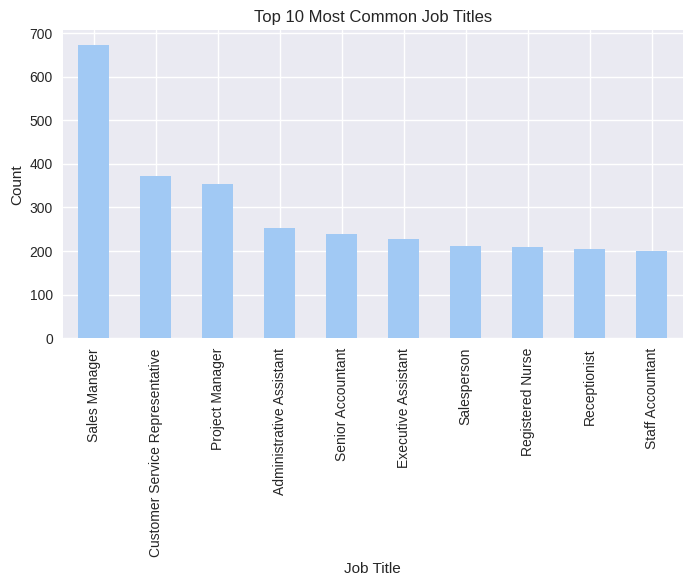

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns
df['title'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.show()

In [267]:
df['remote_allowed']

,remote_allowed
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
123844,NaN
123845,1.0
123846,1.0
123847,1.0


##2. Summary & Visualization


###Missing value analysis

Total missing values in the data set is:  1269564 

job_id                             0
company_name                    1719
title                              0
description                        7
max_salary                     94056
pay_period                     87776
location                           0
company_id                      1717
views                           1689
med_salary                    117569
min_salary                     94056
formatted_work_type                0
applies                       100529
original_listed_time               0
remote_allowed                108603
job_posting_url                    0
application_url                36665
application_type                   0
expiry                             0
closed_time                   122776
formatted_experience_level     29409
skills_desc                   121410
listed_time                        0
posting_domain                 39968
sponsored                          0
work_type              

,column,missing_value_rate
0,job_id,0.000000
1,title,0.000000
2,location,0.000000
3,formatted_work_type,0.000000
4,original_listed_time,0.000000
5,job_posting_url,0.000000
6,expiry,0.000000
7,application_type,0.000000
8,sponsored,0.000000
9,listed_time,0.000000


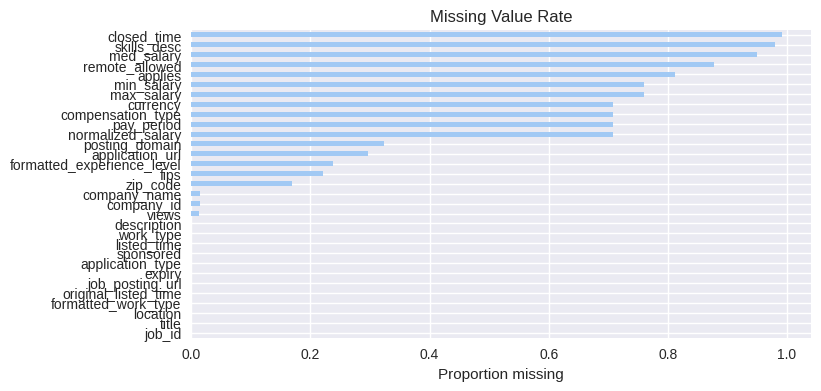


Non missing values per column


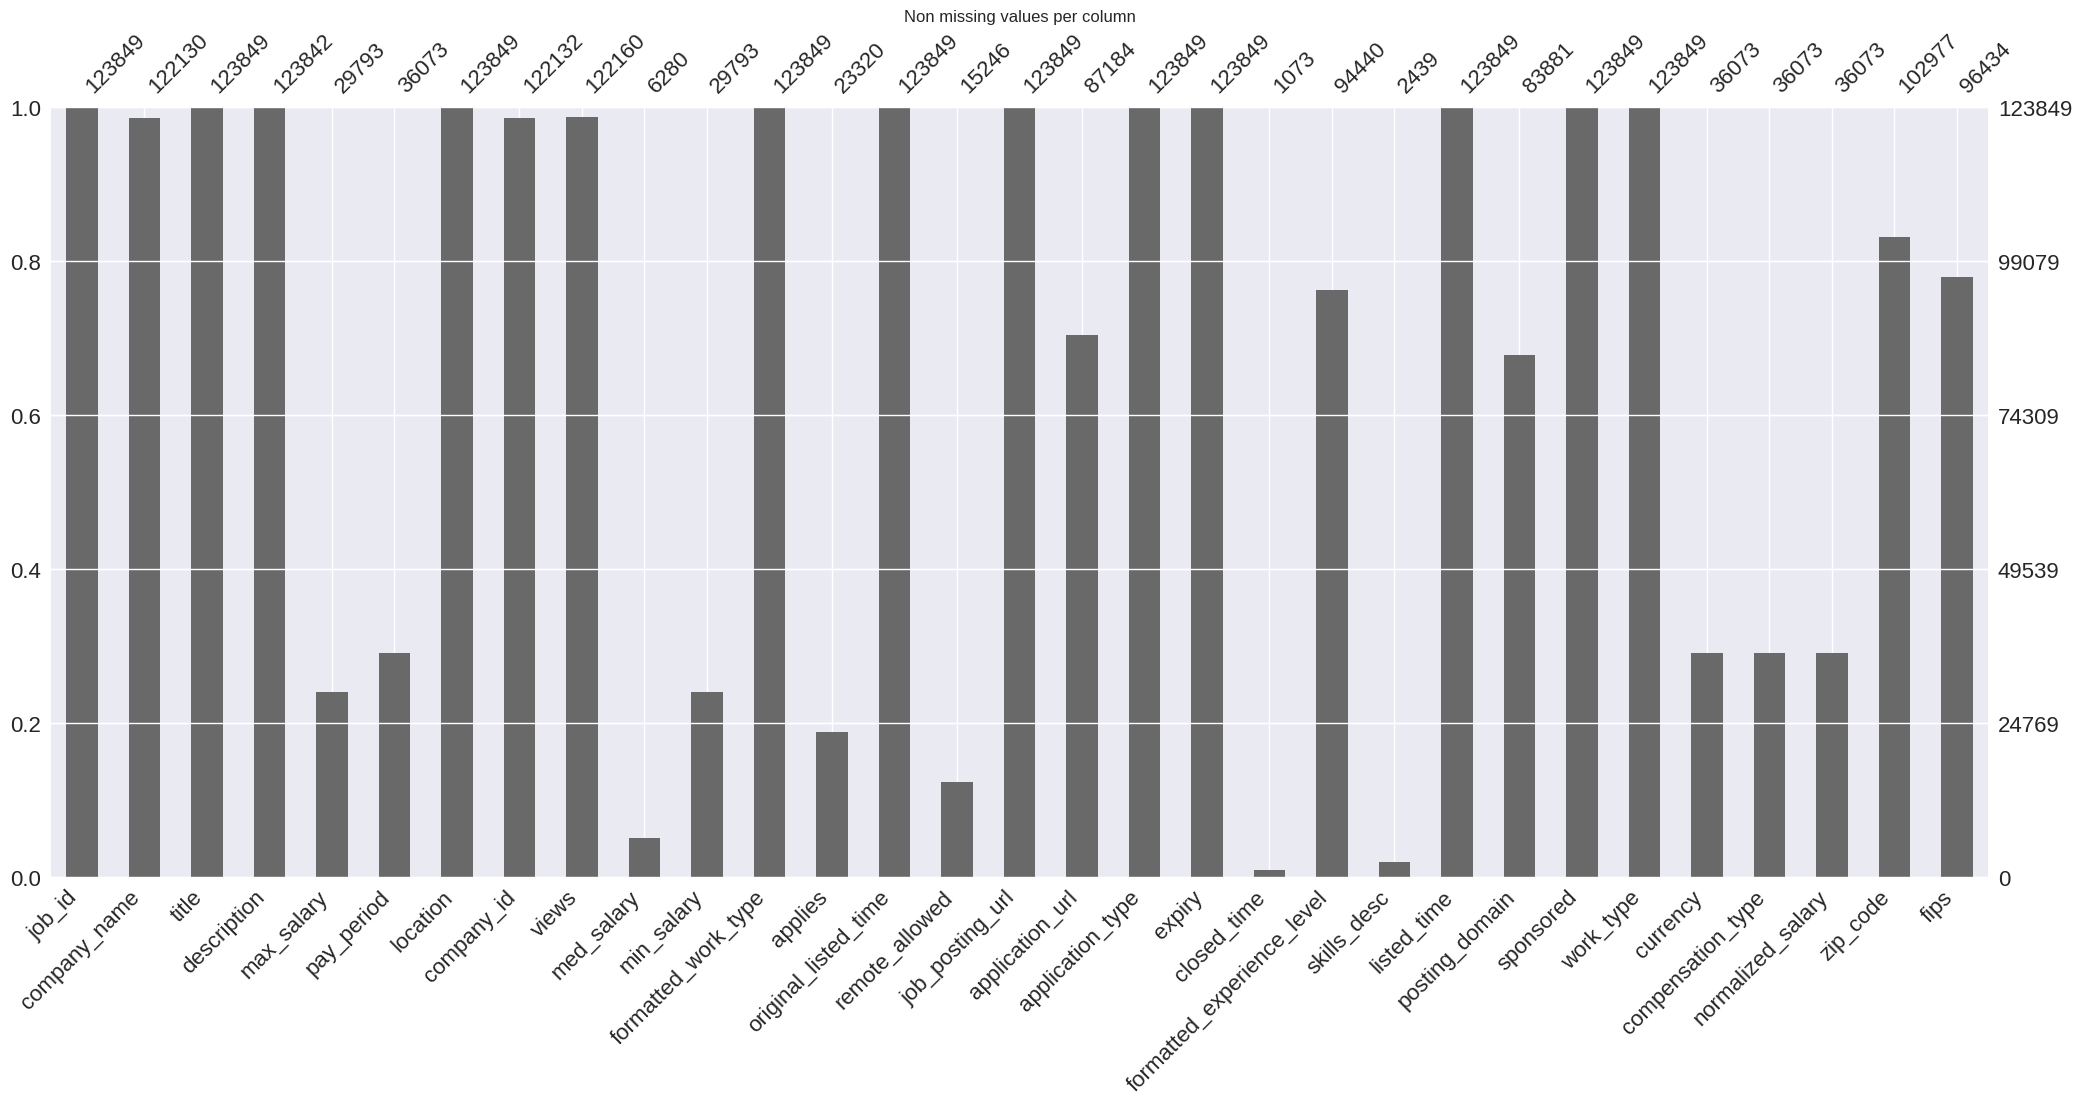

In [268]:
from pathlib import Path
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import missingno as msno

OUT = Path("./artifacts"); OUT.mkdir(exist_ok=True)
plt.rcParams["figure.figsize"] = (8,4)

# missing values
totalMissingValues= df.isnull().sum().sum()
print( 'Total missing values in the data set is: ', totalMissingValues,"\n")
print(df.isnull().sum()) #it's already implemented above

# missing value rate is the percentage of missing value in a column
print( "\nMissing Value Rate ")
miss = df.isna().mean().sort_values()
miss_df = miss.to_frame("missing_value_rate").reset_index().rename(columns={"index":"column"})
display(miss_df)

# visualize of missing value rate
miss.plot(kind="barh", title="Missing Value Rate")
plt.xlabel("Proportion missing")
plt.show()

#it will help to visualize empty or almost empty columes
print("\nNon missing values per column")
msno.bar(df)
plt.title("Non missing values per column")
plt.show()

### Numeric Summary

In [269]:
# The numeric summary is on selected columns (numeric only)
num_cols = [c for c in df.select_dtypes(include=["number"]).columns if df[c].notna().sum() > 0]
desc = df[num_cols].describe().T
desc["var"] = df[num_cols].var(numeric_only=True)
display(desc)

,count,mean,std,min,25%,50%,75%,max,var
job_id,123849.0,3.896402e+09,8.404355e+07,9.217160e+05,3.894587e+09,3.901998e+09,3.904707e+09,3.906267e+09,7.063317e+15
max_salary,29793.0,9.193942e+04,7.011101e+05,1.000000e+00,4.828000e+01,8.000000e+04,1.400000e+05,1.200000e+08,4.915554e+11
company_id,122132.0,1.220401e+07,2.554143e+07,1.009000e+03,1.435200e+04,2.269650e+05,8.047188e+06,1.034730e+08,6.523647e+14
views,122160.0,1.461825e+01,8.590360e+01,1.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00,9.975000e+03,7.379428e+03
med_salary,6280.0,2.201562e+04,5.225587e+04,0.000000e+00,1.894000e+01,2.550000e+01,2.510500e+03,7.500000e+05,2.730676e+09
min_salary,29793.0,6.491085e+04,4.959738e+05,1.000000e+00,3.700000e+01,6.000000e+04,1.000000e+05,8.500000e+07,2.459900e+11
applies,23320.0,1.059198e+01,2.904739e+01,1.000000e+00,1.000000e+00,3.000000e+00,8.000000e+00,9.670000e+02,8.437511e+02
original_listed_time,123849.0,1.713152e+12,4.848209e+08,1.701811e+12,1.712863e+12,1.713395e+12,1.713478e+12,1.713573e+12,2.350513e+17
remote_allowed,15246.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
expiry,123849.0,1.716213e+12,2.321394e+09,1.712903e+12,1.715481e+12,1.716042e+12,1.716088e+12,1.729125e+12,5.388870e+18


###Visualizations of Variable Distributions

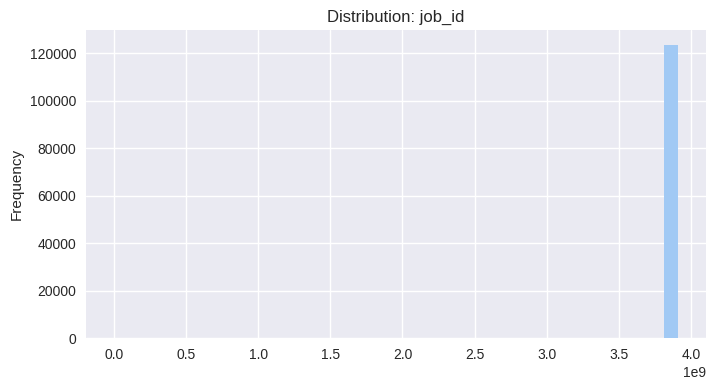

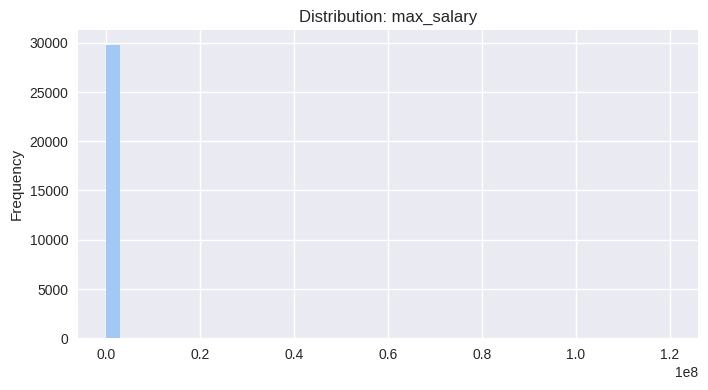

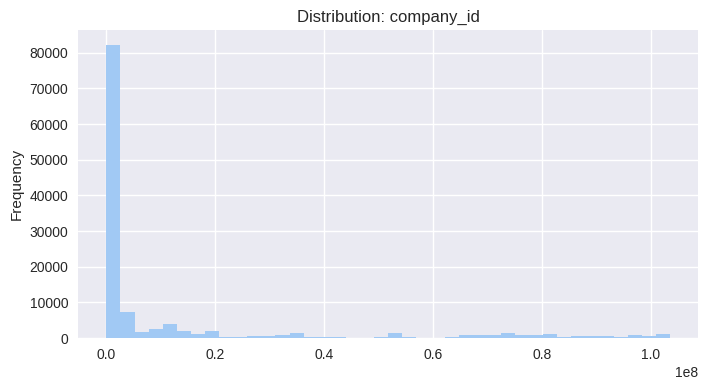

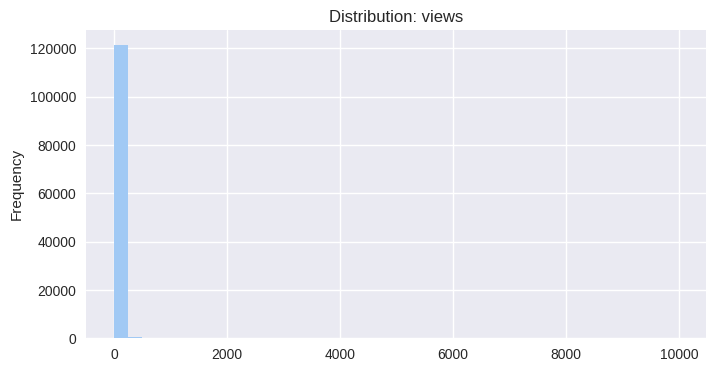

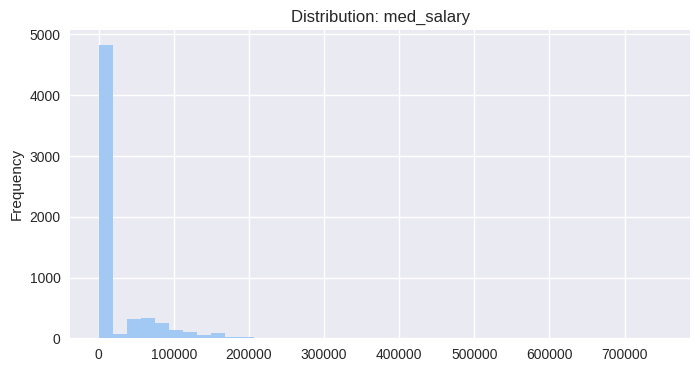

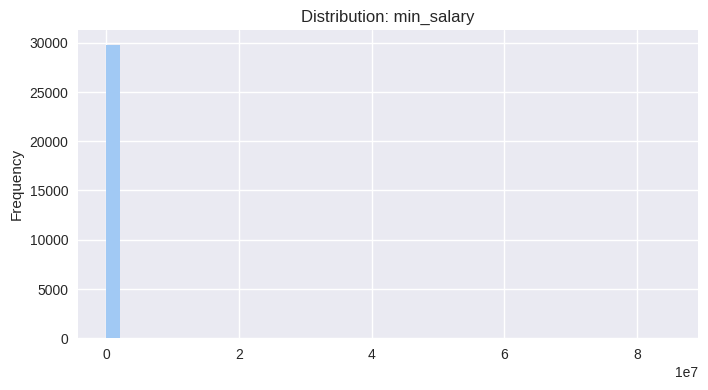

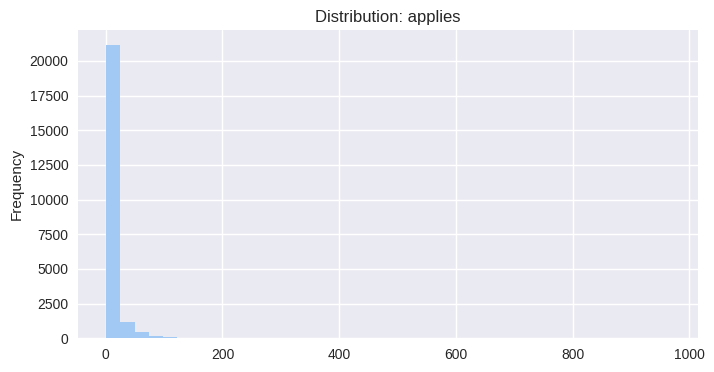

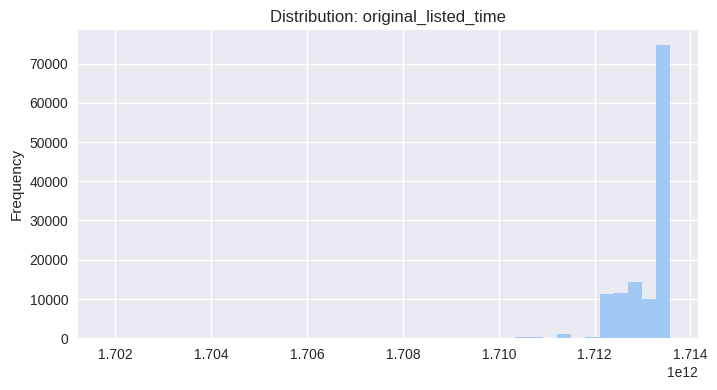

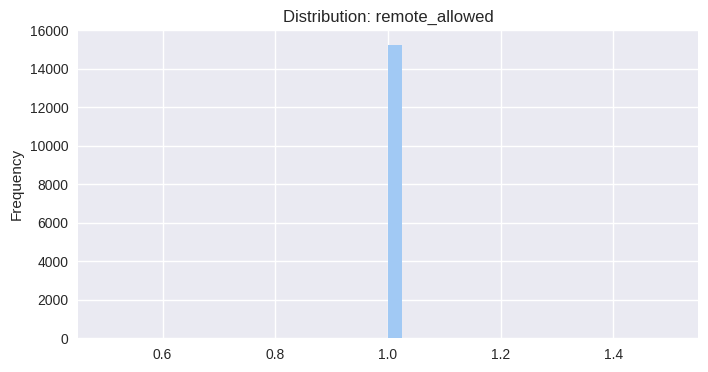

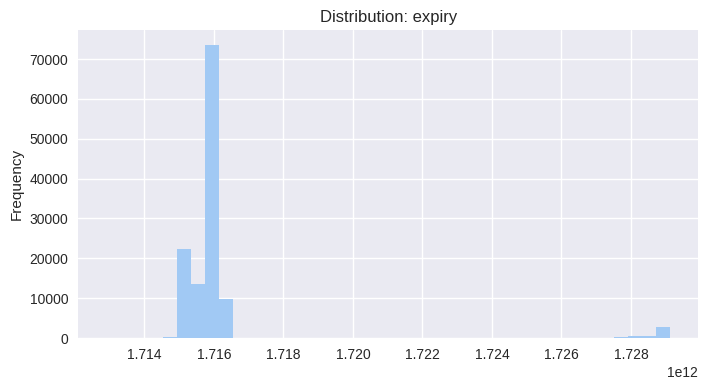

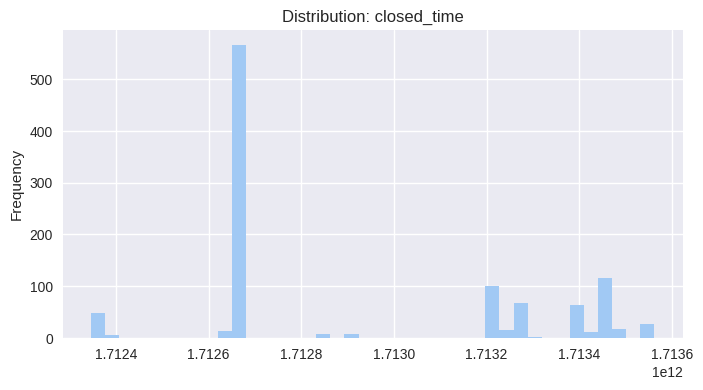

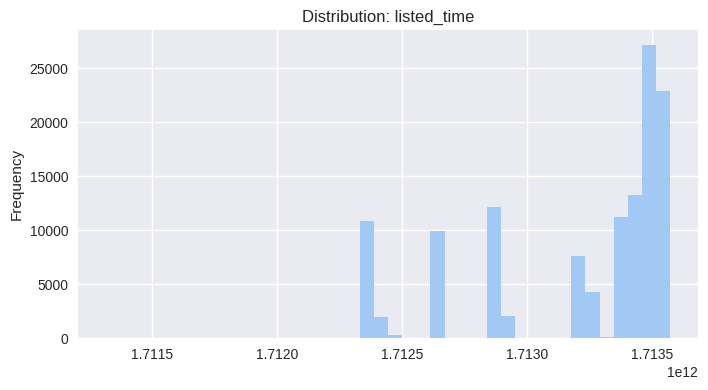

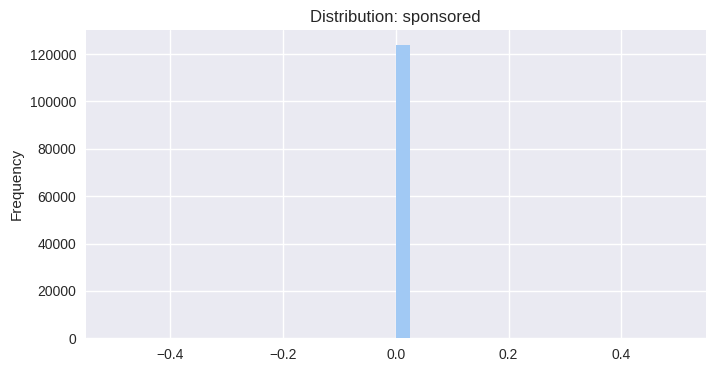

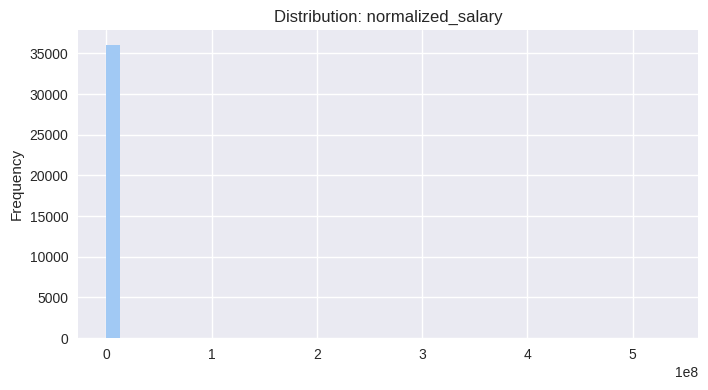

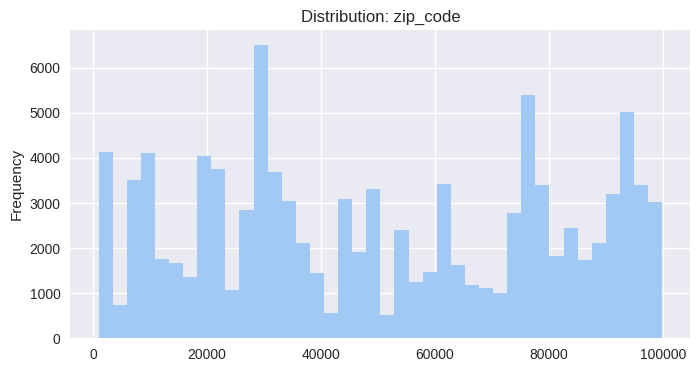

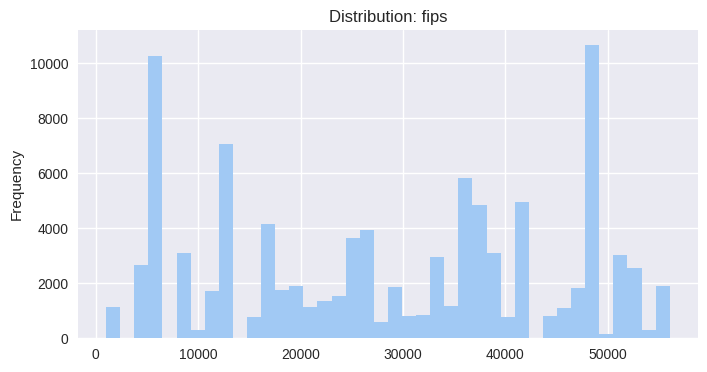

In [270]:
#  Distributions for numeric columns
for c in num_cols:
  df[c].dropna().plot(kind="hist", bins=40, title=f"Distribution: {c}")
  plt.show()

Text columns (15): ['company_name', 'title', 'description', 'pay_period', 'location', 'formatted_work_type', 'job_posting_url', 'application_url', 'application_type', 'formatted_experience_level', 'skills_desc', 'posting_domain', 'work_type', 'currency', 'compensation_type']
[company_name] treated as long/free text (median_len=15, uniques=24423); skipped.
[title] treated as long/free text (median_len=28, uniques=72106); skipped.
[description] treated as long/free text (median_len=3435, uniques=107758); skipped.


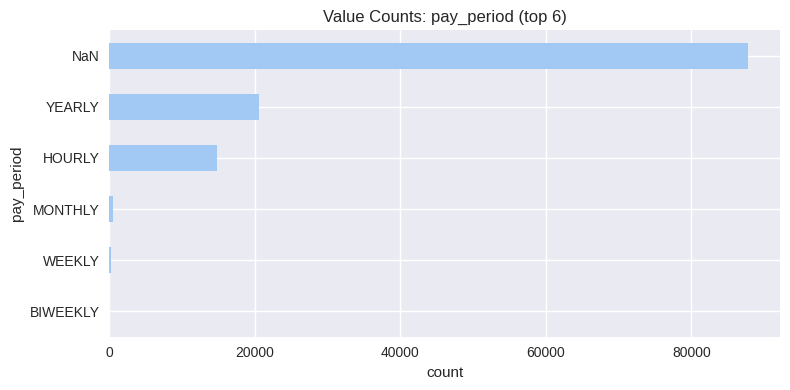

[location] treated as long/free text (median_len=13, uniques=8526); skipped.


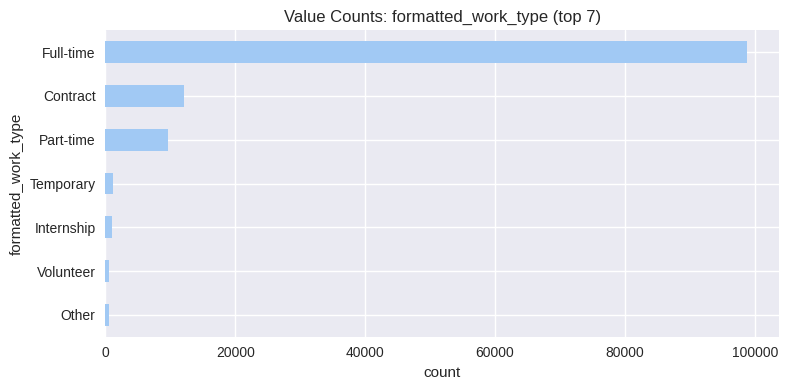

[job_posting_url] treated as long/free text (median_len=69, uniques=123849); skipped.
[application_url] treated as long/free text (median_len=108, uniques=84800); skipped.


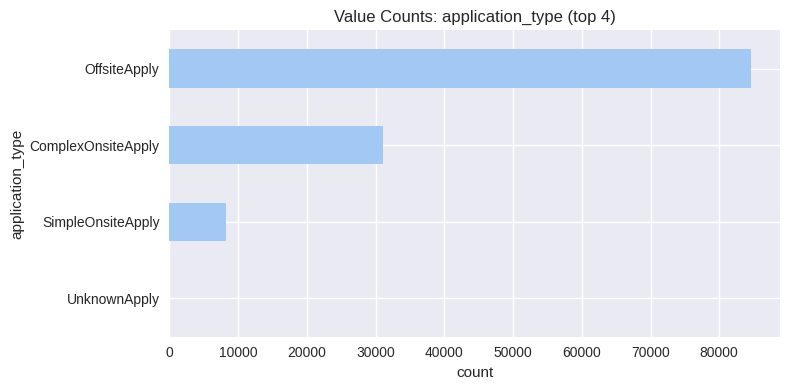

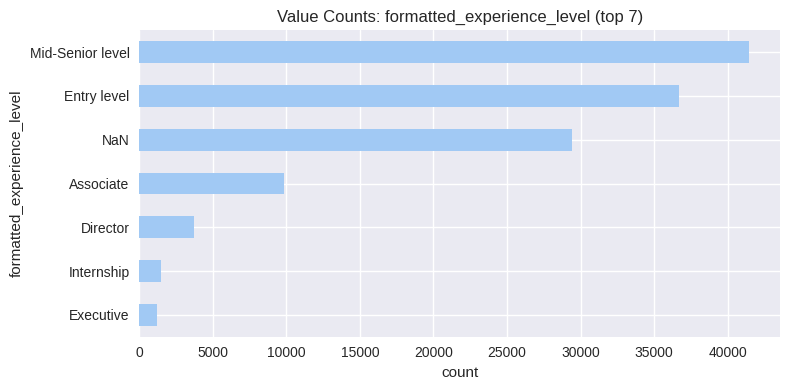

[skills_desc] treated as long/free text (median_len=29, uniques=2212); skipped.
[posting_domain] treated as long/free text (median_len=20, uniques=4443); skipped.


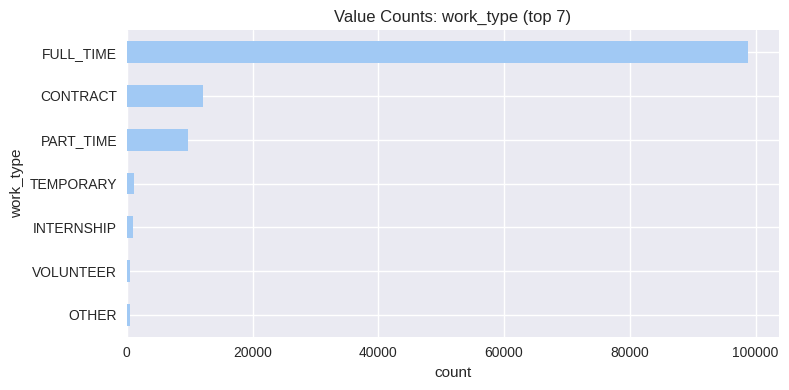

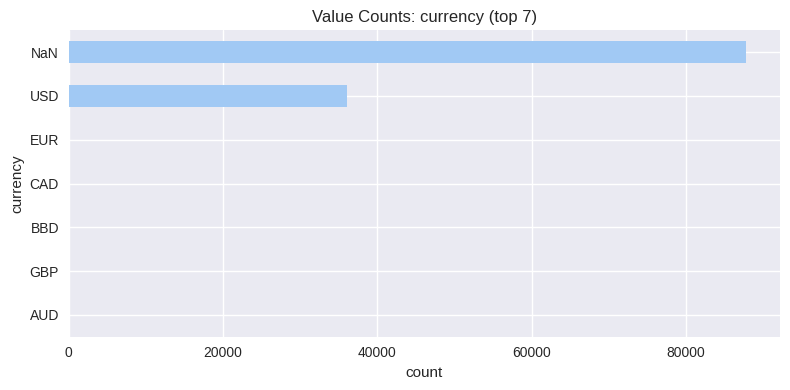

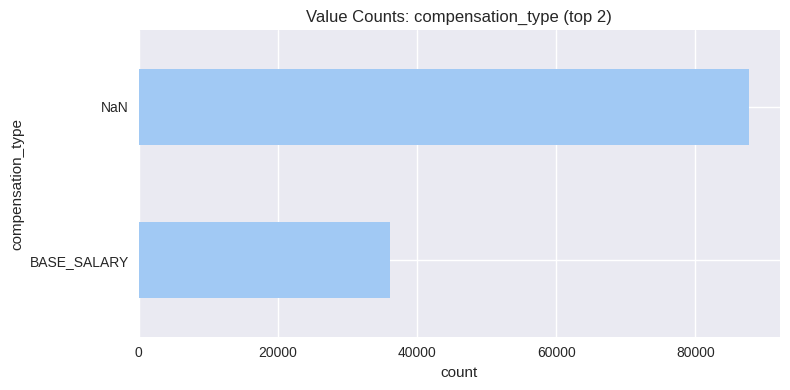

In [271]:
# Distributions for text columns
# note since the distribution of long text are meaningless so i drop them
text_cols = list(df.select_dtypes(include=['object','category']).columns)
print(f"Text columns ({len(text_cols)}): {text_cols}")

for col in text_cols:
    s = df[col].astype(str).str.strip()
    s = s.mask(s.str.lower().eq("nan"))

    # take only short text
    s_nonnull = s.dropna()
    if s_nonnull.empty:
        print(f"[{col}] all values are NaN; skipping.")
        continue

    median_len = s_nonnull.map(len).median()
    n_unique   = s_nonnull.nunique()

    if (median_len < 60) and (n_unique < 2000):
        vc = s.value_counts(dropna=False)
        idx = vc.index.to_series()
        idx = idx.where(~idx.isna(), "NaN")
        plot_series = pd.Series(vc.values, index=idx)

        head = plot_series.head(20).sort_values()
        head.plot(kind='barh', title=f"Value Counts: {col} (top {len(head)})")
        plt.xlabel("count"); plt.tight_layout(); plt.show()
    else:
      print(f"[{col}] treated as long/free text (median_len={median_len:.0f}, uniques={n_unique}); skipped.")


###Class Imbalance

,value,count
0,Sales Manager,673
1,Customer Service Representative,373
2,Project Manager,354
3,Administrative Assistant,254
4,Senior Accountant,238
5,Executive Assistant,228
6,Salesperson,211
7,Registered Nurse,210
8,Receptionist,204
9,Staff Accountant,200


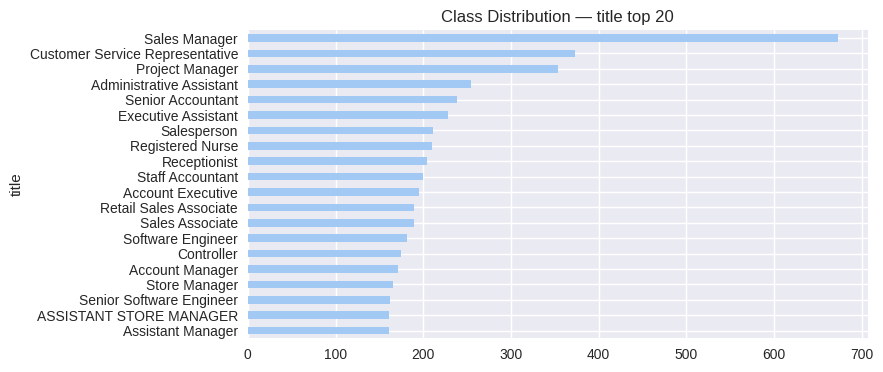

,value,count
0,Liberty Healthcare and Rehabilitation Services,1108
1,The Job Network,1003
2,J. Galt,604
3,TEKsystems,529
4,"Lowe's Companies, Inc.",527
5,Ingersoll Rand,517
6,Capital One,496
7,Cogent Communications,476
8,Insight Global,418
9,Dice,415


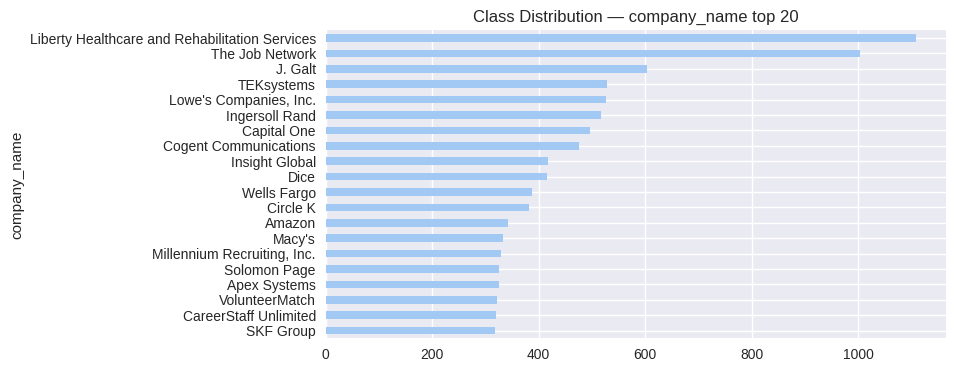

,value,count
0,United States,8125
1,"New York, NY",2756
2,"Chicago, IL",1834
3,"Houston, TX",1762
4,"Dallas, TX",1383
5,"Atlanta, GA",1363
6,"Boston, MA",1176
7,"Austin, TX",1083
8,"Charlotte, NC",1075
9,"Phoenix, AZ",1059


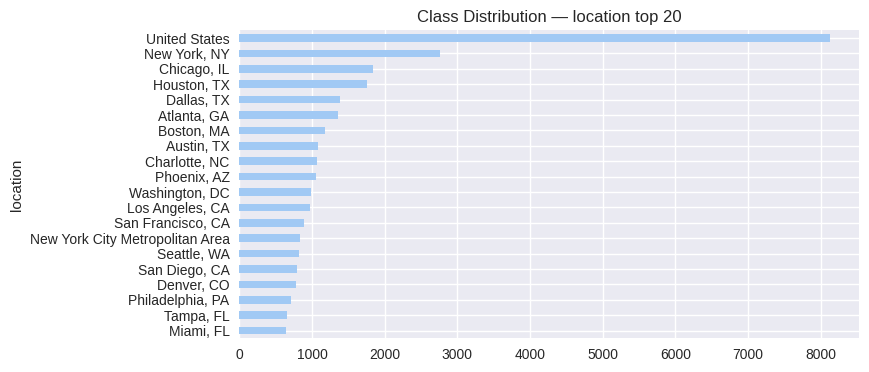

,value,count
0,Mid-Senior level,41489
1,Entry level,36708
2,Associate,9826
3,Director,3746
4,Internship,1449
5,Executive,1222


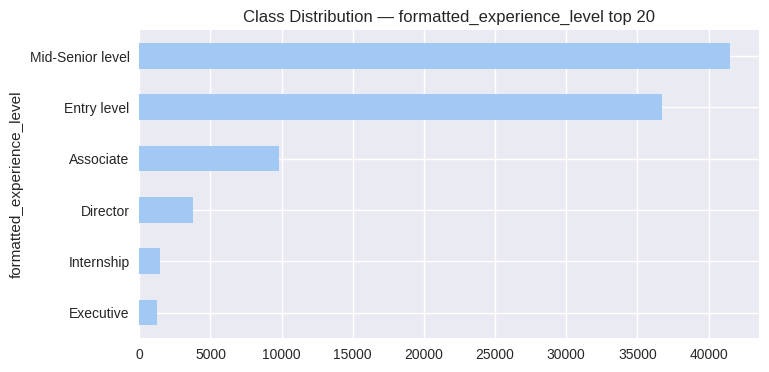

,column,n_unique,top_value,top_count,top_share
0,title,72521,Sales Manager,673,0.005434
1,company_name,24428,Liberty Healthcare and Rehabilitation Services,1108,0.009072
2,location,8526,United States,8125,0.065604
3,formatted_experience_level,6,Mid-Senior level,41489,0.439316


In [272]:
title_col  = next((c for c in df.columns if c in ["job_title","title"]), None)
company_col= next((c for c in df.columns if c in ["company","company_name"]), None)
loc_col    = next((c for c in df.columns if c in ["location","job_location","country","city"]), None)
exp_col    = next((c for c in df.columns if c in ["formatted_experience_level","seniority","level"]), None)

cat_cols = [c for c in [title_col, company_col, loc_col, exp_col] if c]
balance_rows = []
for c in cat_cols:
    vc = df[c].astype(str).replace("nan", np.nan).dropna().value_counts()
    if vc.empty:
        continue
    display(pd.DataFrame({"value": vc.index[:20], "count": vc.values[:20]}))
    vc.head(20).sort_values().plot(kind="barh", title=f"Class Distribution — {c} top 20")
    plt.show()
    balance_rows.append({
        "column": c, "n_unique": int(vc.shape[0]),
        "top_value": vc.index[0], "top_count": int(vc.iloc[0]),
        "top_share": float(vc.iloc[0]/vc.sum())
    })

if balance_rows:
    balance_df = pd.DataFrame(balance_rows)
    display(balance_df)

###visualizing relationships


Visualizing Relationships: Location, Title & Experience Level

 location vs formatted_experience_level


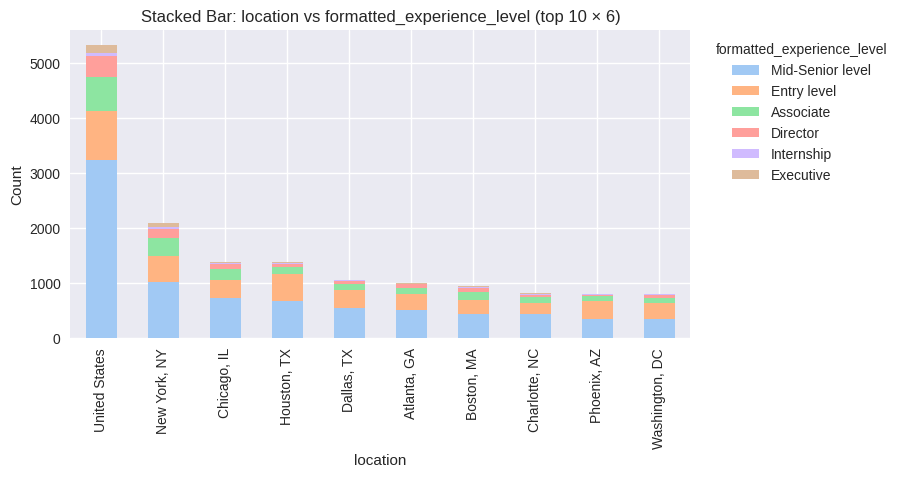


 title vs location


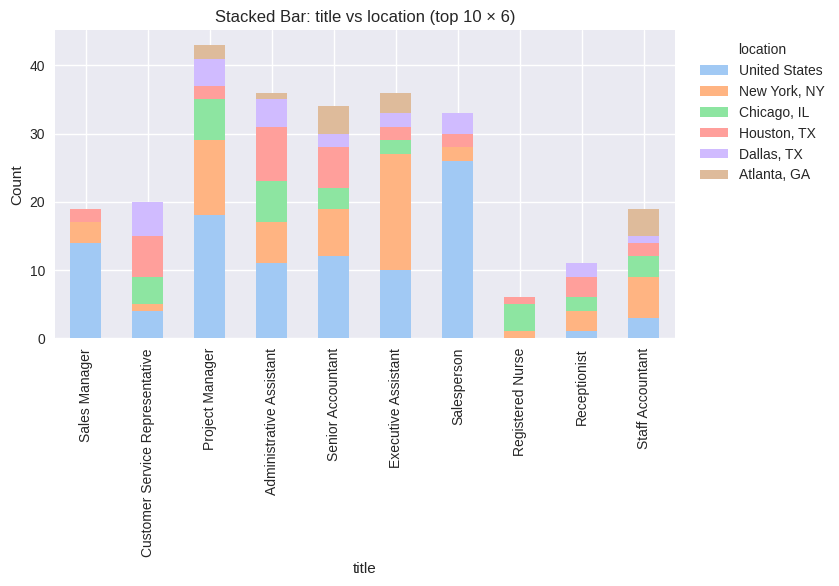


 title vs formatted_experience_level


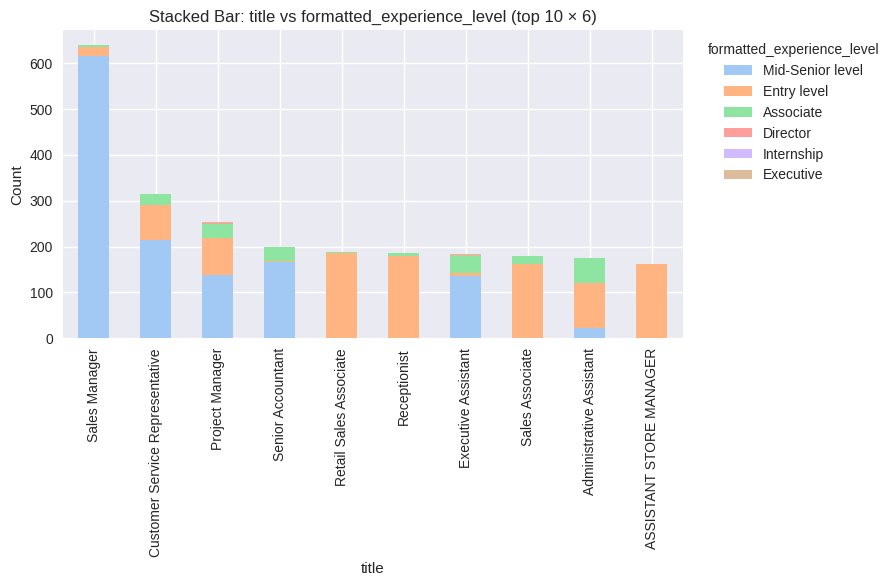

In [273]:
# Visualizing Relationships
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

PAIRS = [
    ("location", "formatted_experience_level"),
    ("title", "location"),
    ("title", "formatted_experience_level")
]

def safe_top_index(s: pd.Series, k: int) -> list:
    return list(s.value_counts(dropna=False).head(k).index)

def plot_stacked_bar(df_xy, xname, yname):
    x, y = df_xy[xname], df_xy[yname]
    top_x, top_y = safe_top_index(x, 10), safe_top_index(y, 6)
    fil = df_xy[x.isin(top_x) & y.isin(top_y)]
    if fil.empty:
        print(f"[skip] No overlap for {xname} vs {yname}")
        return
    ct = pd.crosstab(fil[xname], fil[yname]).reindex(index=top_x, columns=top_y, fill_value=0)
    ax = ct.plot(kind="bar", stacked=True)
    ax.set_title(f"Stacked Bar: {xname} vs {yname} (top {len(top_x)} × {len(top_y)})")
    ax.set_xlabel(xname); ax.set_ylabel("Count")
    ax.legend(title=yname, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.show()

print("Visualizing Relationships: Location, Title & Experience Level")
for xname, yname in PAIRS:
    if xname not in df.columns or yname not in df.columns:
        print(f"[warn] One of the columns not found: {xname}, {yname}")
        continue
    xa, xb = df[xname], df[yname]
    merged = pd.DataFrame({xname: xa, yname: xb}).dropna()
    if merged.empty:
        print(f"[skip] Empty data for {xname} vs {yname}")
        continue
    print(f"\n {xname} vs {yname}")
    plot_stacked_bar(merged, xname, yname)

##3.Preprocessing Techniques

###Handle Missing Values

In [274]:
# STEP 1: Drop irrelevant or redundant columns
# These columns are not useful for career and hiring insights
df.drop(columns=[
    'job_id',                 # Identifier only
    'med_salary',             # Too many missing values (~95%)
    'pay_period',             # Salary-related, not useful
    'currency',               # Related to pay info
    'compensation_type',      # Related to pay info
    'application_type',       # Metadata
    'job_posting_url',        # Link, not analytical
    'expiry',                 # Timestamp
    'listed_time',            # Timestamp
    'original_listed_time',   # Timestamp
    'company_id',             # Redundant (company_name already used)
    'normalized_salary',      # Sparse, not needed
    'work_type',              # Duplicate of formatted_work_type
    'sponsored'               # Advertisement flag, not analytical
], inplace=True, errors='ignore')


# STEP 2: Fill remaining missing values appropriately
df['description'] = df['description'].fillna('Unknown')
df['company_name'] = df['company_name'].fillna('Unknown')
df['skills_desc'] = df['skills_desc'].fillna('Unknown')
df['formatted_experience_level'] = df['formatted_experience_level'].fillna('Unknown')
df['formatted_work_type'] = df['formatted_work_type'].fillna('Unknown')
df['views'] = df['views'].fillna(0)
df['applies'] = df['applies'].fillna(0)
df['remote_allowed'] = df['remote_allowed'].fillna(0)
df['location'] = df['location'].fillna('Unknown')


# STEP 3: Keep only the most relevant columns for analysis
df = df[[
    'company_name',
    'title',
    'description',
    'skills_desc',
    'formatted_experience_level',
    'formatted_work_type',
    'location',
    'views',
    'applies',
    'remote_allowed'
]]


#  STEP 4: Final check
print("Data cleaning complete!\n")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}\n")
print("Remaining missing values per column:")
print(df.isnull().sum())



Data cleaning complete!

Total rows: 123849
Total columns: 10

Remaining missing values per column:
company_name                  0
title                         0
description                   0
skills_desc                   0
formatted_experience_level    0
formatted_work_type           0
location                      0
views                         0
applies                       0
remote_allowed                0
dtype: int64


###Correct any inconsistent data entries.

In [275]:
# STEP 1: Standardize column names
df.columns = (
    df.columns
    .str.strip()            # remove leading/trailing spaces
    .str.lower()            # lowercase all names
    .str.replace(' ', '_')  # replace spaces with underscores
)

# STEP 2: Split 'location' into 'city' and 'state' (if applicable)
if 'location' in df.columns:
    location_split = df['location'].astype(str).str.split(',', expand=True)

    if location_split.shape[1] == 2:
        df[['city', 'state']] = location_split
        df['city'] = df['city'].str.strip().str.title()    # Normalize capitalization
        df['state'] = df['state'].str.strip().str.title()
    else:
        df['city'] = location_split[0].str.strip().str.title()
        df['state'] = None

#  STEP 3: Remove duplicate rows
df = df.drop_duplicates()

# STEP 4: Normalize text columns
def _to_str(s):
    """Convert to string, strip whitespace, lowercase for uniformity."""
    return s.astype('string').str.strip().str.lower()

text_cols = [
    'company_name',
    'title',
    'description',
    'skills_desc',
    'formatted_experience_level',
    'formatted_work_type',
    'location',
    'city',
    'state'
]

for c in text_cols:
    if c in df.columns:
        df[c] = _to_str(df[c])

#  STEP 5: Ensure numeric columns are clean and consistent
numeric_cols = ['views', 'applies', 'remote_allowed']
for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0).astype(int)

#  STEP 6: Final check
print("Inconsistent data entries corrected.\n")
print("Remaining duplicates:", df.duplicated().sum())
print("Total rows:", len(df))
print("Columns:", df.columns.tolist())
print("\nData types summary:")
print(df.dtypes.astype(str).to_dict())


Inconsistent data entries corrected.

Remaining duplicates: 9
Total rows: 122490
Columns: ['company_name', 'title', 'description', 'skills_desc', 'formatted_experience_level', 'formatted_work_type', 'location', 'views', 'applies', 'remote_allowed', 'city', 'state']

Data types summary:
{'company_name': 'string', 'title': 'string', 'description': 'string', 'skills_desc': 'string', 'formatted_experience_level': 'string', 'formatted_work_type': 'string', 'location': 'string', 'views': 'int64', 'applies': 'int64', 'remote_allowed': 'int64', 'city': 'string', 'state': 'string'}
